In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

In [4]:
df=pd.read_csv('india-news-headlines.csv')

In [5]:
df.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [6]:
data_text = df[['headline_text']].astype('str')

In [7]:
data_text.shape

(3297172, 1)

In [8]:
data_text=data_text.loc[1:100000,:]

In [9]:
data_text.shape

(100000, 1)

In [10]:
stopw=stopwords.words('english')
def stopwords_remove(x):
    terms=x.split()
    terms=[w for w in terms if w not in stopw]
    sentence=' '.join(terms)
    return sentence
data_text['Refined_headlines']=data_text['headline_text'].apply(lambda x: stopwords_remove(x))

In [11]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text['Word_Count']=data_text['Refined_headlines'].apply(lambda x: word_count(x))

In [12]:
data_text.head()

,headline_text,Refined_headlines,Word_Count
1,Status quo will not be disturbed at Ayodhya; s...,Status quo disturbed Ayodhya; says Vajpayee,6
2,Fissures in Hurriyat over Pak visit,Fissures Hurriyat Pak visit,4
3,America's unwanted heading for India?,America's unwanted heading India?,4
4,For bigwigs; it is destination Goa,For bigwigs; destination Goa,4
5,Extra buses to clear tourist traffic,Extra buses clear tourist traffic,5


In [13]:
data_text['Word_Count'].describe()

count    100000.000000
mean          4.751210
std           1.341384
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          16.000000
Name: Word_Count, dtype: float64

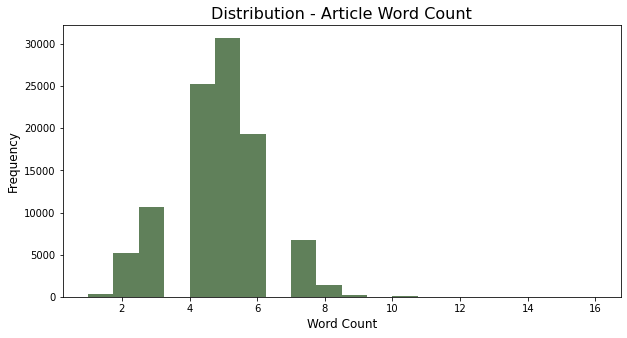

In [25]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    data_text['Word_Count'],
    bins=20,
    color='#60805A'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.show()

In [15]:
headline_sentences=[''.join(text) for text in data_text['Refined_headlines']]

In [16]:
vectorizer = CountVectorizer(max_features=5000)
x_counts = vectorizer.fit_transform(headline_sentences)

In [17]:
x_counts

<100000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [18]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [19]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [20]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [21]:
num_topics=5
model = NMF(n_components=num_topics, init='nndsvd');
model.fit(xtfidf_norm)

/home/emo/miniconda3/envs/nlp/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(init='nndsvd', n_components=5)

In [22]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    
    return pd.DataFrame(word_dict)

In [23]:
get_nmf_topics(model, 30)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,the,india,city,new,it
1,man,us,round,govt,govt
2,speaking,pak,sports,police,time
3,counsellor,china,police,year,says
4,art,no,scan,gets,day
5,week,says,briefs,chief,life
6,life,terrorism,old,no,no
7,world,may,power,cm,bjp
8,mall,musharraf,water,state,back
9,sound,visit,no,get,meet
